In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
ap=pd.read_csv(r'C:\Users\Sai\Desktop\pyhton csv files\AirPassengers.csv')

In [4]:
ap.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
ap.shape

(144, 2)

In [6]:
ap.isnull().sum()[ap.isnull().sum()>0]

Series([], dtype: int64)

In [7]:
# Aim:- forecast the value for next 2 years

In [8]:
ap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [9]:
ap.Month=pd.to_datetime(ap.Month)

In [10]:
ap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [11]:
ap=ap.set_index('Month')

In [12]:
ap.head(15)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


In [13]:
ap.shape

(144, 1)

In [14]:
import matplotlib.pyplot as plt

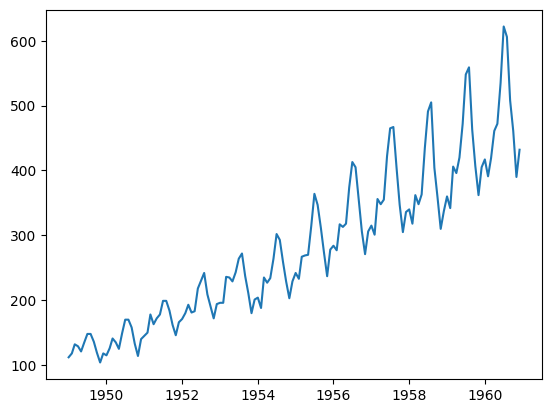

In [15]:
plt.plot(ap)

In [16]:
from statsmodels.tsa.stattools import adfuller # adfuller is used to check if data is stationary or not
# in adf the null hypothesis is that series is not stationary (not in syllabus)

In [17]:
adfuller(ap.diff().diff().dropna())

(-16.384231542468505,
 2.7328918500142407e-29,
 11,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 988.60204172756)

In [18]:
from statsmodels.tsa.stattools import kpss # is used to check series is stationary or not
# nulls in kpss is exactly opposite to ADF
# in kpss the null hypothesis is that seris is stationary
# in adfuller the null hypothesis is that series is not stationary

In [19]:
kpss(ap.diff().dropna())

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.023897614400183967,
 0.1,
 7,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [24]:
# data is seasonal within year and uptrend within year

In [25]:
ap.diff()

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
...,...
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0


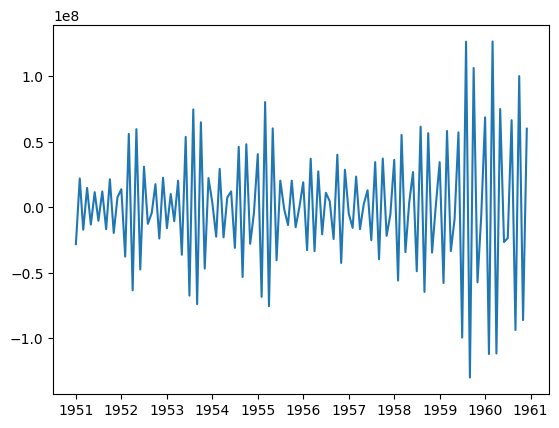

In [26]:
plt.plot(ap.diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff())

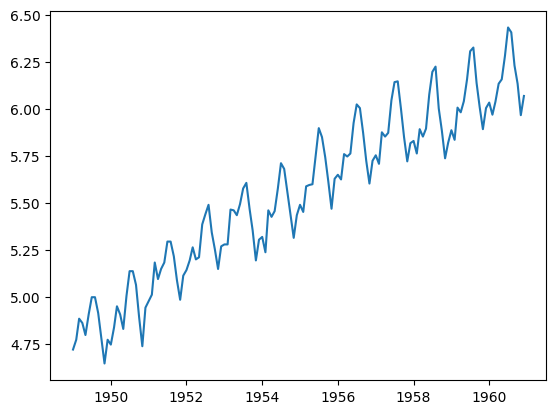

In [27]:
ap1=np.log(ap)
plt.plot(ap1)

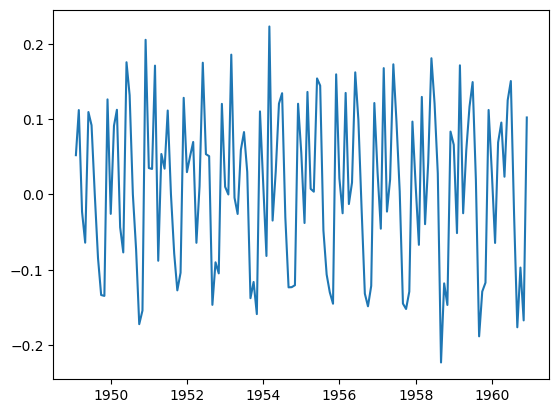

In [28]:
plt.plot(ap1.diff())

In [29]:
# taking log and then level 1 diff D-->1
ap1 # model is build on ap1--> PREDICTION 
# to get the answer in actual numbers --> anti log

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


In [34]:
!pip install pmdarima


Defaulting to user installation because normal site-packages is not writeable
     ------------------------------------ 613.3/613.3 kB 756.6 kB/s eta 0:00:00
     ---------------------------------------- 2.8/2.8 MB 2.1 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [35]:
from pmdarima.arima import auto_arima

In [31]:
#pip install pmdarima

In [36]:
auto_arima(ap1,seasonal=True  , m= 12) # pass these values in sarimax

ARIMA(order=(2, 0, 0), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True)

In [37]:
from statsmodels.tsa.statespace.sarimax  import SARIMAX

In [38]:
# VALUES FROM AUTO ARIMA IS PASSED TO SARIMAX

In [39]:
model_sarima = SARIMAX(ap1, order = (2,0,0), seasonal_order= (0,1,1,12)) # create the instanse 

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [40]:
results = model_sarima.fit() # fit the model 

In [41]:
pred_log =results.predict(start = 144 , end = 167)

# prediction fo next 24 months

In [42]:
pred = np.round(np.exp(pred_log))

In [43]:
pred

#   predictions are good or not good ???


1961-01-01    448.0
1961-02-01    422.0
1961-03-01    475.0
1961-04-01    487.0
1961-05-01    503.0
1961-06-01    576.0
1961-07-01    661.0
1961-08-01    657.0
1961-09-01    549.0
1961-10-01    488.0
1961-11-01    422.0
1961-12-01    468.0
1962-01-01    484.0
1962-02-01    456.0
1962-03-01    513.0
1962-04-01    526.0
1962-05-01    543.0
1962-06-01    621.0
1962-07-01    712.0
1962-08-01    708.0
1962-09-01    591.0
1962-10-01    526.0
1962-11-01    454.0
1962-12-01    503.0
Freq: MS, Name: predicted_mean, dtype: float64

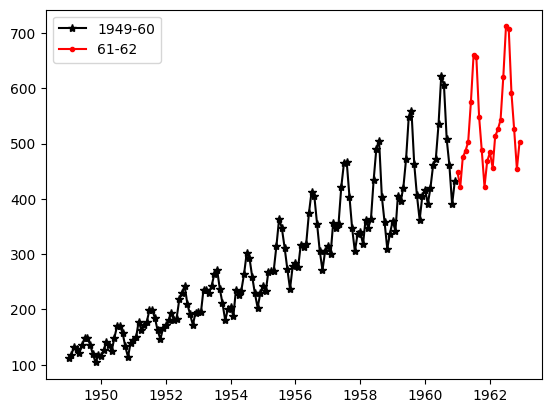

In [44]:
plt.plot(ap, color ='black'  , label ='1949-60',marker ="*")
plt.plot(pred, color ='red'  , label ='61-62', marker ='.')
plt.legend()

In [45]:
# seasonal , sampling

# SARIMAX

